In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [18]:
batch_size=256
image_size=(256, 256)

In [19]:
train_dataset = image_dataset_from_directory('dataset/training_set',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.


In [20]:
validation_dataset = image_dataset_from_directory('dataset/validation_set',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 200 files belonging to 2 classes.
Using 20 files for validation.


In [21]:
class_names = train_dataset.class_names 
class_names

['cats', 'dogs']

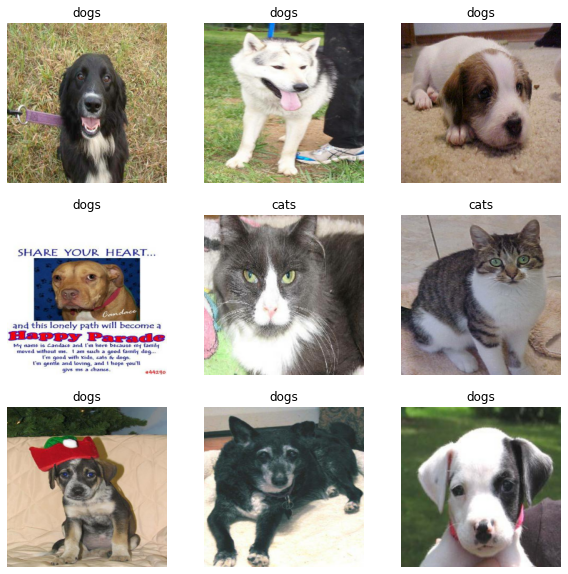

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [23]:
test_dataset = image_dataset_from_directory('dataset/test_set',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 1800 files belonging to 2 classes.


In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [25]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(32, (5, 5), padding='same', 
                 input_shape=(256, 256, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 2 нейронa по количеству классов
model.add(Dense(2, activation='softmax'))

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [27]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=2)

Epoch 1/5
29/29 - 920s - loss: 96.0354 - accuracy: 0.5056 - val_loss: 0.7002 - val_accuracy: 0.4500
Epoch 2/5
29/29 - 955s - loss: 0.6934 - accuracy: 0.5142 - val_loss: 0.6739 - val_accuracy: 0.6000
Epoch 3/5
29/29 - 1092s - loss: 0.6904 - accuracy: 0.5283 - val_loss: 0.6678 - val_accuracy: 0.6500
Epoch 4/5
29/29 - 1126s - loss: 0.6844 - accuracy: 0.5551 - val_loss: 0.6944 - val_accuracy: 0.5500
Epoch 5/5
29/29 - 1074s - loss: 0.6869 - accuracy: 0.5521 - val_loss: 0.6810 - val_accuracy: 0.6000


In [28]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)

8/8 [==============================] - 61s 7s/step - loss: 0.6819 - accuracy: 0.5600


In [29]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))


Доля верных ответов на тестовых данных, в процентах: 56.0


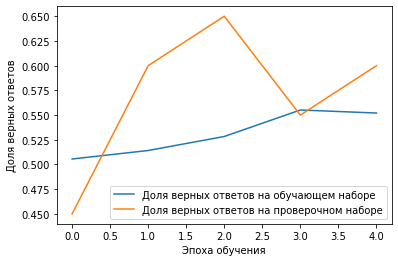

In [30]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

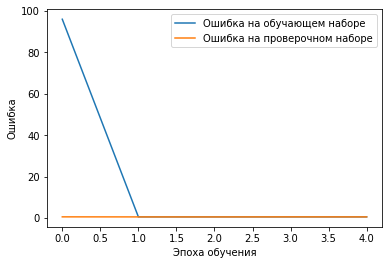

In [31]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [32]:
model.save("model.h5")